# "Working with string methods in pandas"
> "Once we get used to pandas' ability to vectorize code, we want to use it all the time. Doing this with string columns requires a bit more ceremony."

- toc: true
- badges: false
- comments: false
- author: Martin
- categories: [pandas, strings]

One of the most useful features of `pandas` is its ability to take a bit of code that looks like it operates on a single bit of data, and have it operate on a whole bunch of different values. 

> Tip: For a much more detailed explanation vectorization and lots more string processing examples, checkout the chapter on working with groups in the [*Drawing from Data* book](https://drawingfromdata.com/book/).

To see an example, let's load a dataset that shows fuel efficiency for different car models:

In [1]:
import pandas as pd
pd.options.display.max_rows = 10

df = pd.read_csv(
   "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
   )
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Each row is a car, and for each car we have miles per gallon (mpg), plus a bunch of information about the engine and car, and finally the name. Say we want to convert the horsepower column into Kilowatts (kW). A quick trip to Google shows that one horsepower equals 0.7457 kW, so we might just iterate over the values and convert them like this:

In [2]:
kilowatts = []
for horsepower in df['horsepower']:
    kilowatts.append(horsepower * 0.7457)
kilowatts[:10]

[96.941,
 123.04050000000001,
 111.855,
 111.855,
 104.39800000000001,
 147.64860000000002,
 164.054,
 160.3255,
 167.7825,
 141.683]

However, the magic of `pandas` allows us to do this instead:

In [3]:
df['horsepower'] * 0.7457

0       96.9410
1      123.0405
2      111.8550
3      111.8550
4      104.3980
         ...   
393     64.1302
394     38.7764
395     62.6388
396     58.9103
397     61.1474
Name: horsepower, Length: 398, dtype: float64

We just write the expression as if we were trying to convert a single number, and `pandas` takes care of applying it to the whole series. This is called *vectorization*, and it's generally faster and more convenient than writing `for` loops. 

However, we often run into problems when we try to use the same technique with text data. Let's get a list of the manufacturers for each car, which we can do just by getting the word before the first space in the **name** field.

First we'll use a loop:

In [4]:
manufacturers = []
for model in df['name']:
    manufacturers.append(model.split(' ')[0])
manufacturers[:10]

['chevrolet',
 'buick',
 'plymouth',
 'amc',
 'ford',
 'ford',
 'chevrolet',
 'plymouth',
 'pontiac',
 'amc']

So far so good. Now, can we use the same trick as we did earlier and write the expression as if we're calculating it for a single value?

In [5]:
df['name'].split(' ')[0]

AttributeError: 'Series' object has no attribute 'split'

The magic doesn't work. To put it in simple terms, a pandas `Series` object "knows" about the `*` operator, but it doesn't know anything about `split()`. If we think about it, we can see why this must be the case. A `Series` object has to be able to hold either numbers or text, so it doesn't make sense for it to have methods like `split()` that only work on text. 

One way round this is to switch to `apply()`, which lets us run arbitrary code on values in a series. We can write a function that takes a single name and returns the manufacturer:

In [6]:
def get_manufacturer(name):
    return name.split(' ')[0]

Then apply it to the name column:

In [7]:
df['name'].apply(get_manufacturer)

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: name, Length: 398, dtype: object

But a better way is to use the series `str` attribute. This attribute has nearly all of the string methods that we might be used to, plus a bunch more functionality specific to pandas. Let's start with a simpler example - say we want to change all the names to upper case. Here it is with `apply()`:

In [8]:
df['name'].apply(str.upper)

0      CHEVROLET CHEVELLE MALIBU
1              BUICK SKYLARK 320
2             PLYMOUTH SATELLITE
3                  AMC REBEL SST
4                    FORD TORINO
                 ...            
393              FORD MUSTANG GL
394                    VW PICKUP
395                DODGE RAMPAGE
396                  FORD RANGER
397                   CHEVY S-10
Name: name, Length: 398, dtype: object

And here is is using the `str` attribute:

In [9]:
df['name'].str.upper()

0      CHEVROLET CHEVELLE MALIBU
1              BUICK SKYLARK 320
2             PLYMOUTH SATELLITE
3                  AMC REBEL SST
4                    FORD TORINO
                 ...            
393              FORD MUSTANG GL
394                    VW PICKUP
395                DODGE RAMPAGE
396                  FORD RANGER
397                   CHEVY S-10
Name: name, Length: 398, dtype: object

Going back to our original problem, we can split the name into a list of strings like this:

In [10]:
df['name'].str.split(' ')

0      [chevrolet, chevelle, malibu]
1              [buick, skylark, 320]
2              [plymouth, satellite]
3                  [amc, rebel, sst]
4                     [ford, torino]
                   ...              
393              [ford, mustang, gl]
394                     [vw, pickup]
395                 [dodge, rampage]
396                   [ford, ranger]
397                    [chevy, s-10]
Name: name, Length: 398, dtype: object

Now there's one final complication before we can get just the first word - the result of the expression above is itself a series. So we have to access its `str` attribute again before we can use square brackets to get just the first word:

In [11]:
df['name'].str.split(' ').str[0]

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: name, Length: 398, dtype: object

Now we have a series which contains the data we want. At this point we could store it in a new column:

In [12]:
df['manufacturer'] = df['name'].str.split(' ').str[0]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford


Or do any other type of series processing:

In [13]:
df['name'].str.split(' ').str[0].value_counts()

ford         51
chevrolet    43
plymouth     31
amc          28
dodge        28
             ..
hi            1
chevroelt     1
nissan        1
vokswagen     1
toyouta       1
Name: name, Length: 37, dtype: int64

This technique is also very useful for filtering. Say we want to find just the cars made by Ford. We can use the `startswith` method of the `str` attribute to get a series of boolean values:

In [14]:
df['name'].str.startswith('ford')

0      False
1      False
2      False
3      False
4       True
       ...  
393     True
394    False
395    False
396     True
397    False
Name: name, Length: 398, dtype: bool

Which we can then use as a filter mask:

In [15]:
df[df['name'].str.startswith('ford')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,ford
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick,ford
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250,ford
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto,ford
...,...,...,...,...,...,...,...,...,...,...
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl,ford
373,24.0,4,140.0,92.0,2865,16.4,82,usa,ford fairmont futura,ford
389,22.0,6,232.0,112.0,2835,14.7,82,usa,ford granada l,ford
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford


There are many useful methods hiding in the `str` attribute. Let's find all the cars with names longer than 30 characters, which we can do with the `len()` method:

In [16]:
long_name_cars = df[df['name'].str.len() > 30]
long_name_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
73,13.0,8,307.0,130.0,4098,14.0,72,usa,chevrolet chevelle concours (sw),chevrolet
133,16.0,6,250.0,100.0,3781,17.0,74,usa,chevrolet chevelle malibu classic,chevrolet
187,17.5,8,305.0,140.0,4215,13.0,76,usa,chevrolet chevelle malibu classic,chevrolet
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel,volkswagen
249,19.9,8,260.0,110.0,3365,15.5,78,usa,oldsmobile cutlass salon brougham,oldsmobile
263,17.7,6,231.0,165.0,3445,13.4,78,usa,buick regal sport coupe (turbo),buick
292,18.5,8,360.0,150.0,3940,13.0,79,usa,chrysler lebaron town @ country (sw),chrysler
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham,oldsmobile
387,38.0,6,262.0,85.0,3015,17.0,82,usa,oldsmobile cutlass ciera (diesel),oldsmobile


Here's a common annoyance when making charts with long axis labels:

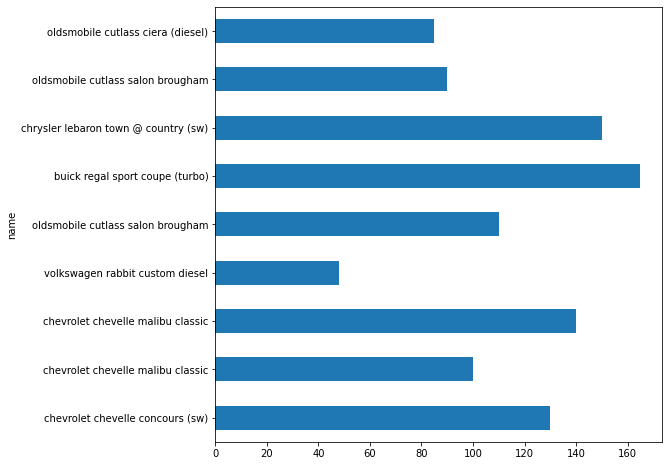

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
long_name_cars.set_index('name')['horsepower'].plot(kind='barh')
None

The long labels take up a bunch of space on the left hand side of the chart. We can fix this by using the `.wrap()` method to split the names over multiple lines:

In [18]:
#hide
pd.options.mode.chained_assignment = None

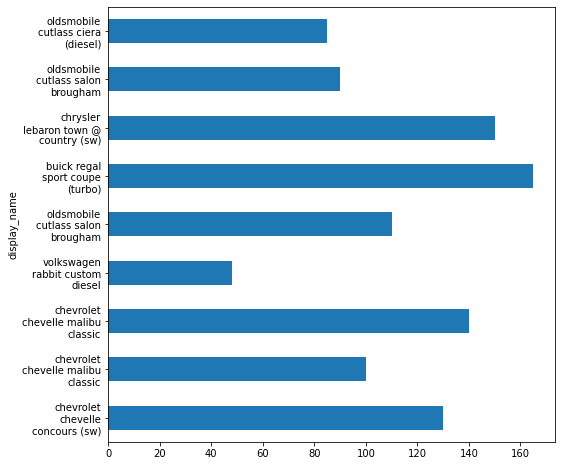

In [24]:
plt.figure(figsize=(8,8))
long_name_cars['display_name'] = long_name_cars['name'].str.wrap(15)
long_name_cars.set_index('display_name')['horsepower'].plot(kind='barh')
None

One last example: a bunch of the car names end with the string "(sw)". Let's find them:

In [20]:
df[df['name'].str.endswith('(sw)')]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw),buick
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw),dodge
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (sw),ford
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw),pontiac
45,18.0,6,258.0,110.0,2962,13.5,71,usa,amc hornet sportabout (sw),amc
...,...,...,...,...,...,...,...,...,...,...
289,16.9,8,350.0,155.0,4360,14.9,79,usa,buick estate wagon (sw),buick
290,15.5,8,351.0,142.0,4054,14.3,79,usa,ford country squire (sw),ford
291,19.2,8,267.0,125.0,3605,15.0,79,usa,chevrolet malibu classic (sw),chevrolet
292,18.5,8,360.0,150.0,3940,13.0,79,usa,chrysler lebaron town @ country (sw),chrysler


The "sw" stands for "Station Wagon". Let's replace the abbreviation with the full name:

In [21]:
df['name'] = df['name'].str.replace("\(sw\)", "(Station Wagon)")
df[40:50]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
40,14.0,8,351.0,153.0,4154,13.5,71,usa,ford galaxie 500,ford
41,14.0,8,318.0,150.0,4096,13.0,71,usa,plymouth fury iii,plymouth
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (Station Wagon),dodge
43,13.0,8,400.0,170.0,4746,12.0,71,usa,ford country squire (Station Wagon),ford
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (Station Wagon),pontiac
45,18.0,6,258.0,110.0,2962,13.5,71,usa,amc hornet sportabout (Station Wagon),amc
46,22.0,4,140.0,72.0,2408,19.0,71,usa,chevrolet vega (Station Wagon),chevrolet
47,19.0,6,250.0,100.0,3282,15.0,71,usa,pontiac firebird,pontiac
48,18.0,6,250.0,88.0,3139,14.5,71,usa,ford mustang,ford
49,23.0,4,122.0,86.0,2220,14.0,71,usa,mercury capri 2000,mercury


Notice that we have to escape the parentheses in the "(sw)" string, as the `replace()` method works on regular expressions. 

There are many other useful string processing methods in the pandas `str` attribute. The [documentation page](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) has a bunch of examples, and a method summary at the end. So before you set out to process strings either by writing a loop, or by using `apply()`, check to see if there's a method there that will do what you want!